In [1]:
using Falcons
using Condor
using Healpix
using Plots

┌ Info: Precompiling Condor [ce3e846d-a250-429b-81e6-e6cf6b410658]
└ @ Base loading.jl:1423
┌ Warning: Package Condor does not have Falcons in its dependencies:
│ - If you have Condor checked out for development and have
│   added Falcons as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Condor
└ Loading Falcons into Condor from project dependency, future warnings for Condor are suppressed.


In [2]:
ss = gen_ScanningStrategy()

day = 60 * 60 * 24
year = day * 365

ss.nside = 128
ss.sampling_rate = 1 #[Hz]
ss.alpha = 45 #[degree]
ss.beta = 50 #[degree]
ss.prec_rpm = period2rpm(192.348)
ss.spin_rpm = 0.05 #[rpm]
ss.hwp_rpm = 46.0 #[rpm]
ss.start_point = "pole" #You can choose "pole" or "equator"
ss.coord="G"  # 
ss.FP_theta = [0] #[target_det.theta[1]]
ss.FP_phi = [0] #[target_det.phi[1]] .+ 30

1-element Vector{Int64}:
 0

In [3]:
theta_tod, phi_tod, psi_tod, alpha_tod, pix_tod = get_pointings_theta_phi_psi_alpha_pix_tod(ss, 0, 100);

In [4]:
l_range = [0,200] 

2-element Vector{Int64}:
   0
 200

In [5]:
lmax = 3ss.nside-1 
npix = nside2npix(ss.nside)
alm = rand(ComplexF64, 3, numberOfAlms(lmax,lmax))
blm = rand(ComplexF64, 3, numberOfAlms(lmax,lmax))

3×73920 Matrix{ComplexF64}:
 0.899699+0.546383im  0.239865+0.447198im  …  0.897041+0.829865im
 0.411117+0.021607im  0.545569+0.591025im     0.561429+0.84343im
 0.634592+0.133863im  0.671321+0.364819im     0.474239+0.374503im

In [6]:
tod = @time tod_convolution_idalhwp(alm, blm, lmax, npix, l_range, theta_tod[:,1], phi_tod[:,1], psi_tod[:,1],alpha_tod[:,1]);

 25.868006 seconds (6.05 M allocations: 3.190 GiB, 1.73% gc time, 3.37% compilation time)


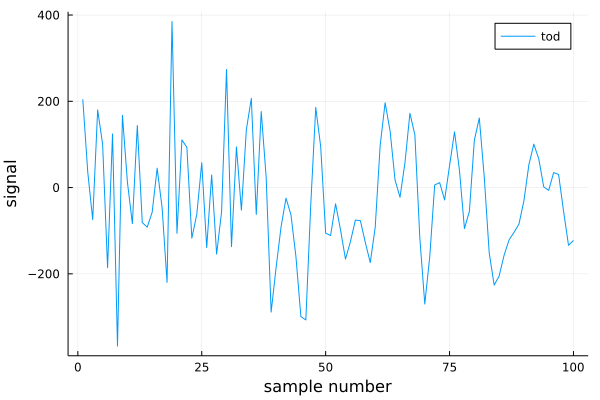

In [7]:
plot(tod, label = "tod", xlabel="sample number", ylabel="signal")